In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,plot_confusion_matrix
import warnings 
warnings.filterwarnings( "ignore")

In [2]:
df=pd.read_csv('167541607652060ec2379f8793842aa5b168a_.csv')

In [3]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [4]:
df.shape

(26707, 34)

In [5]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [7]:
dups=df.duplicated()

In [8]:
dups.sum()

0

In [9]:
correlation=df.corr()

<AxesSubplot:>

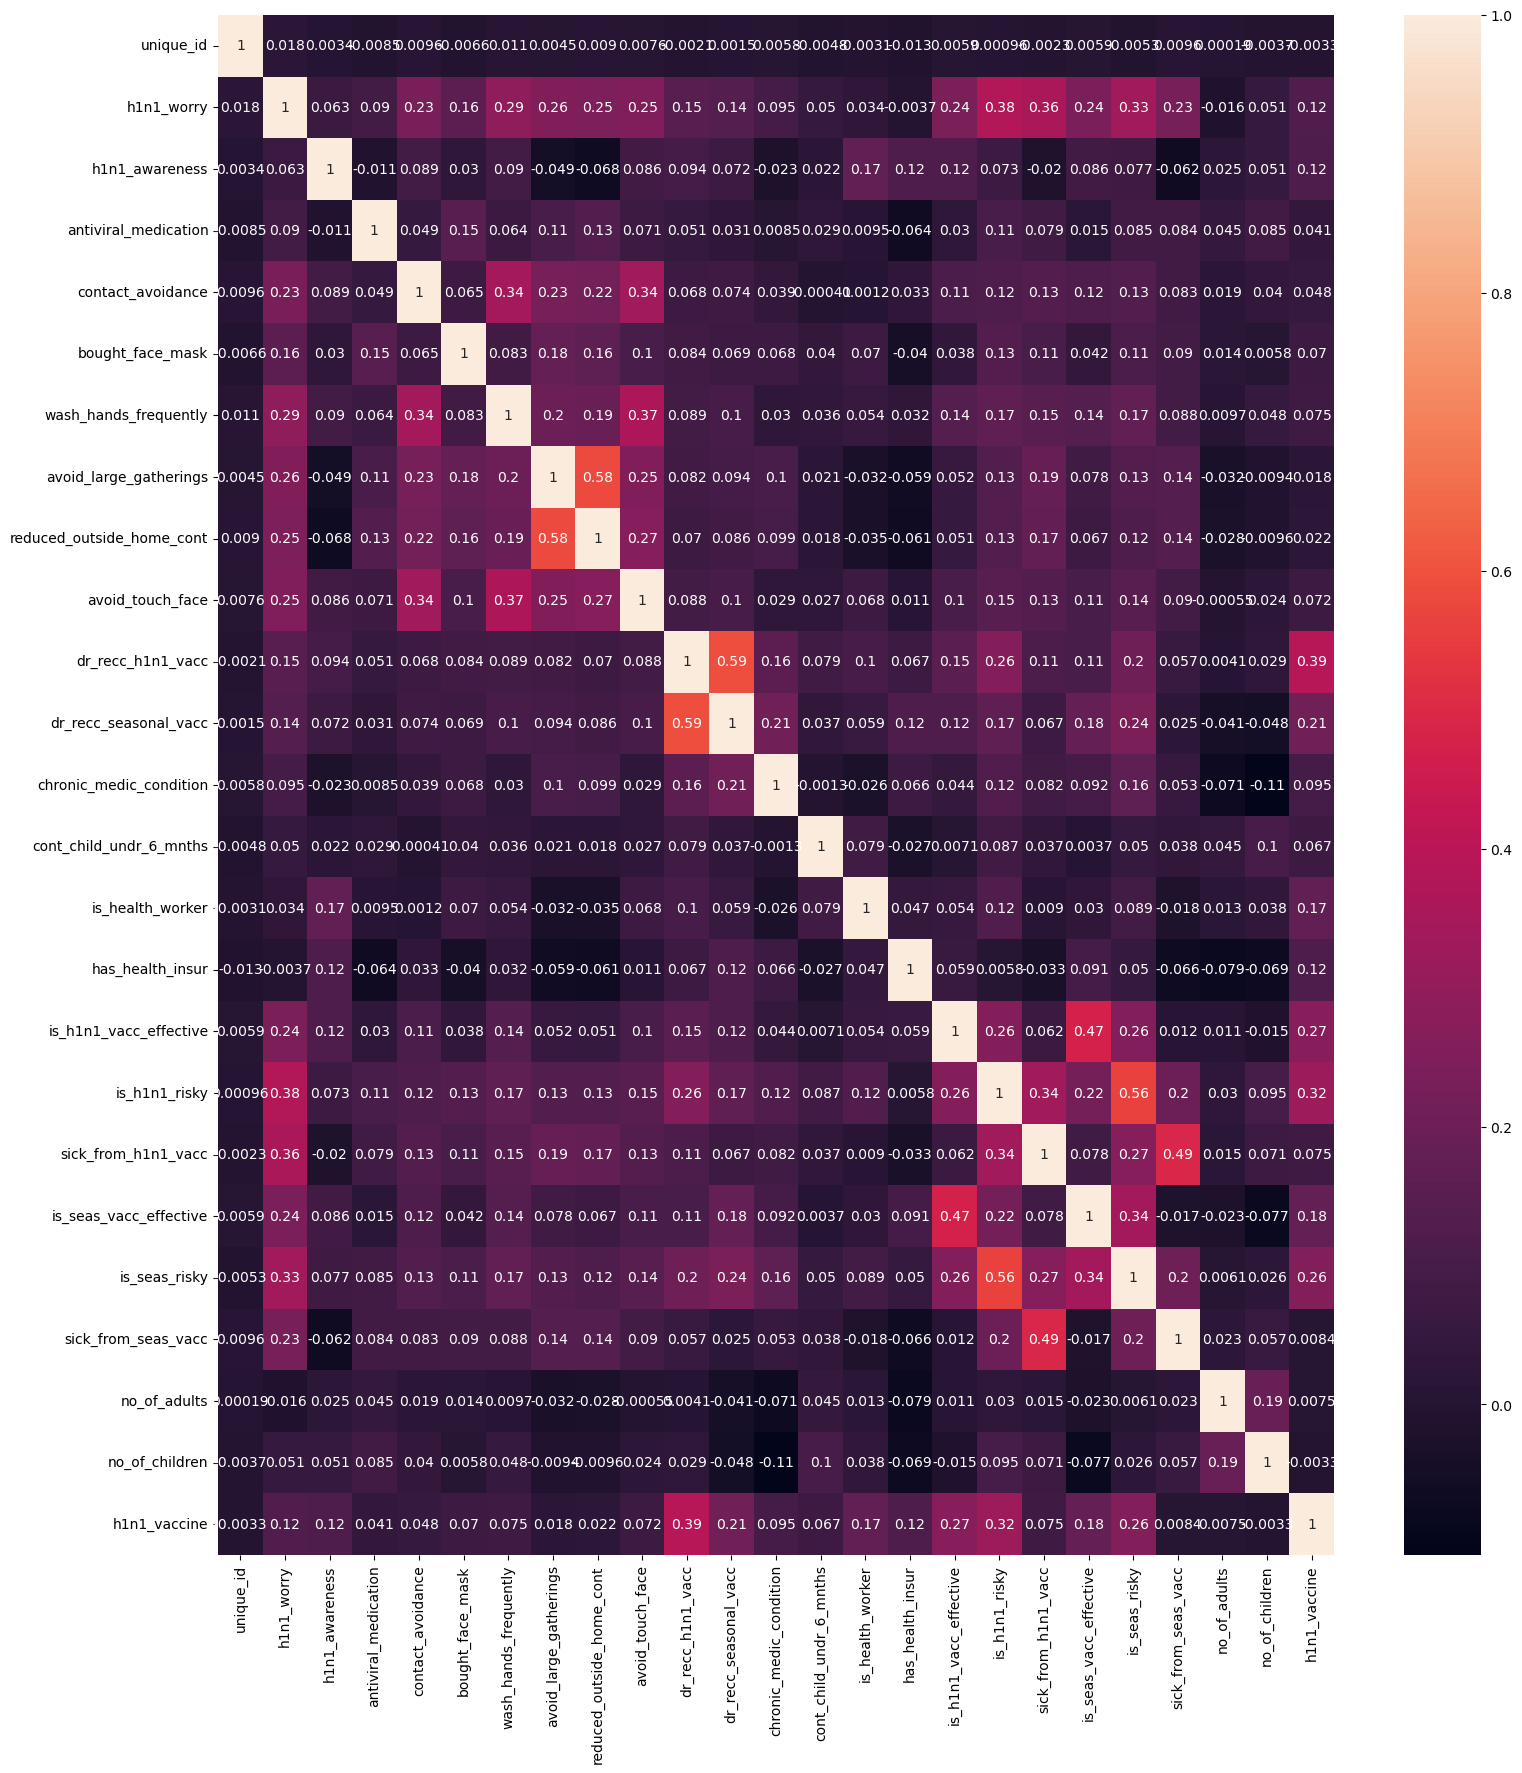

In [10]:
plt.figure(figsize=(18,20))
sns.heatmap(correlation,annot=True)

In [11]:
df['h1n1_vaccine'].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

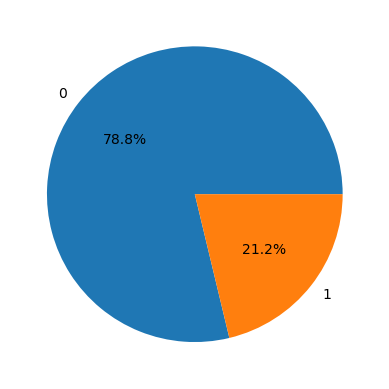

In [12]:
plt.pie(df['h1n1_vaccine'].value_counts(),labels=df['h1n1_vaccine'].value_counts().index,autopct='%1.1f%%');

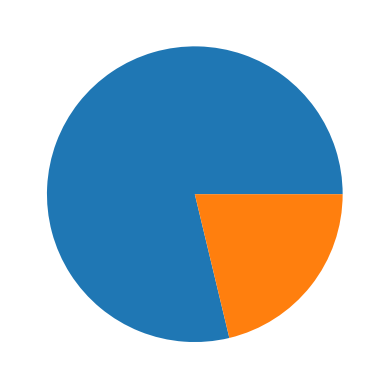

In [13]:
plt.pie(df['h1n1_vaccine'].value_counts());

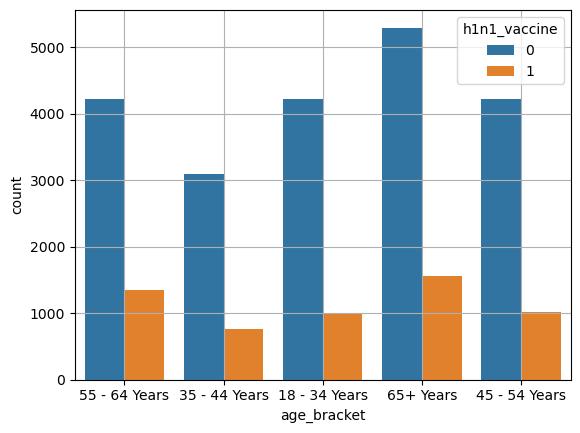

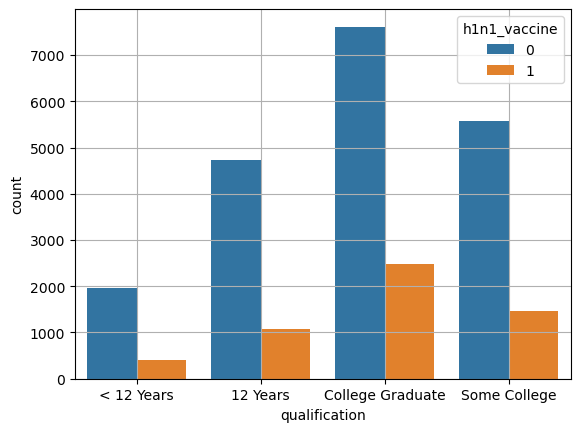

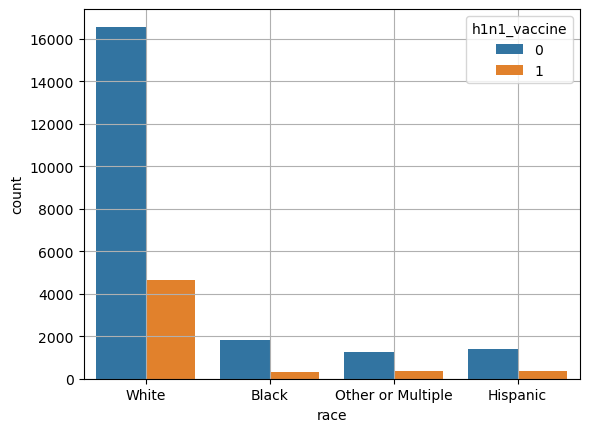

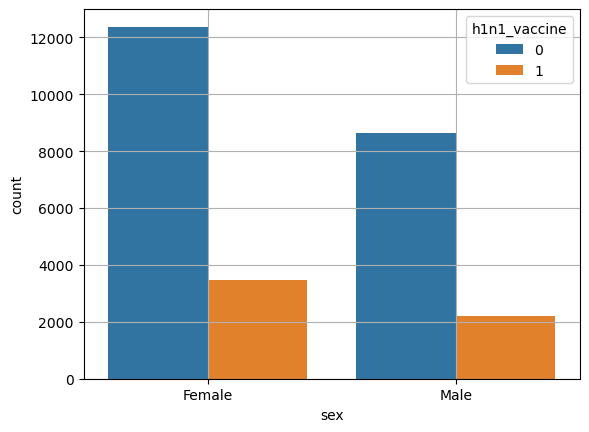

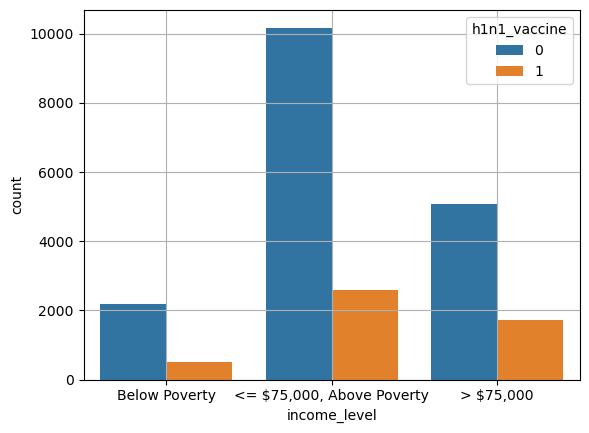

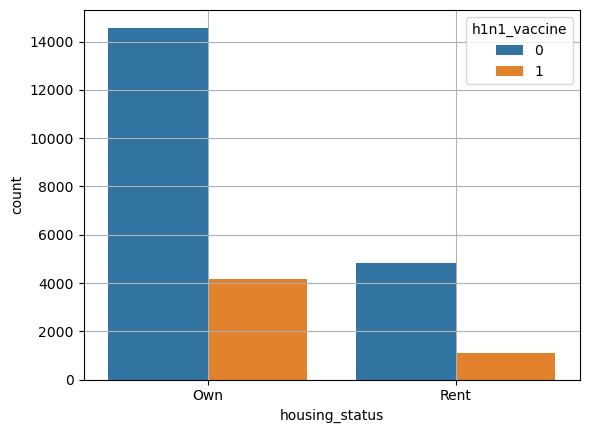

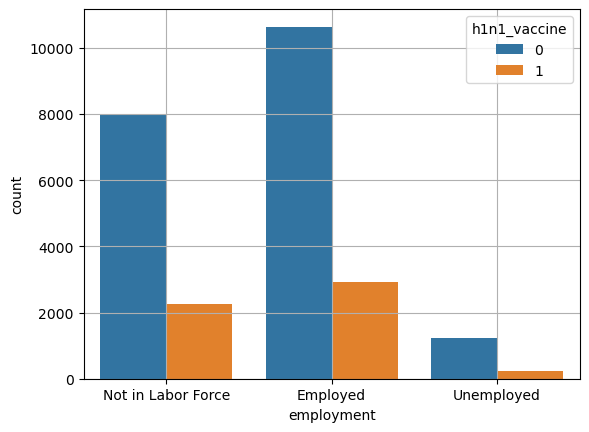

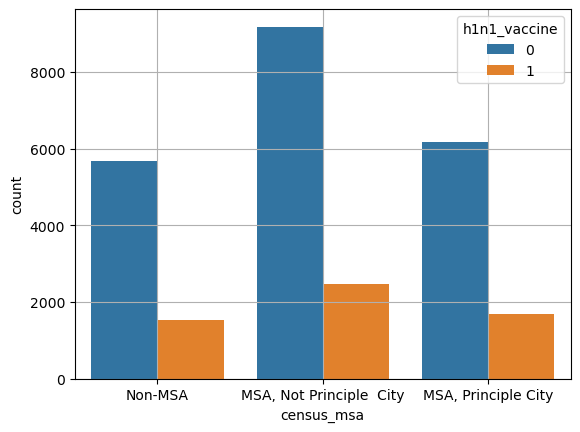

In [14]:
cols=['age_bracket','qualification','race','sex','income_level','housing_status','employment','census_msa']
for i in cols:
    sns.countplot(df[i],hue='h1n1_vaccine',data=df)
    plt.grid()
    plt.show();

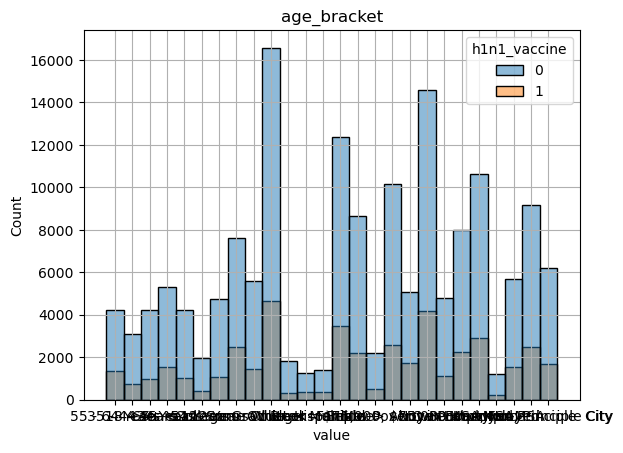

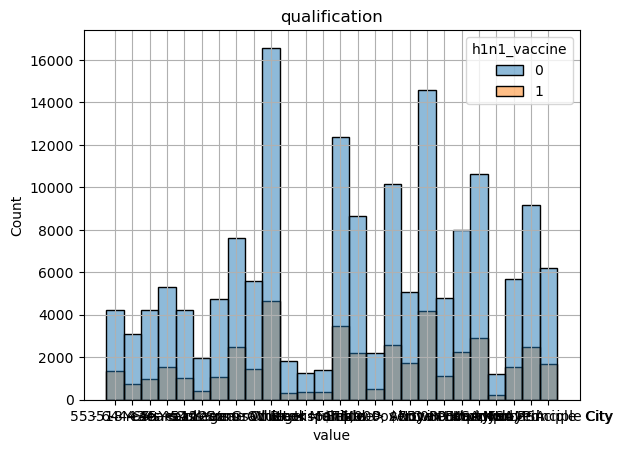

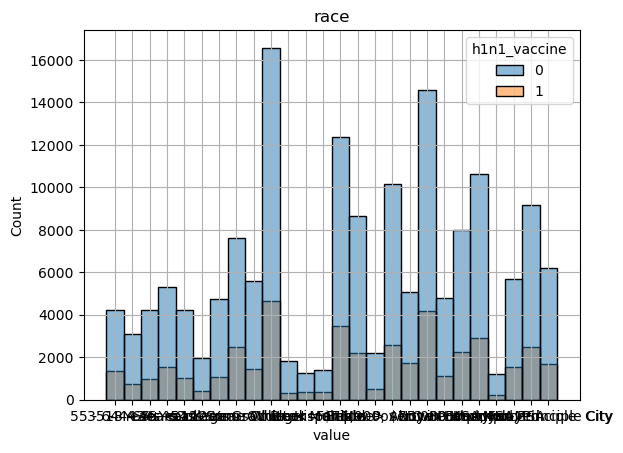

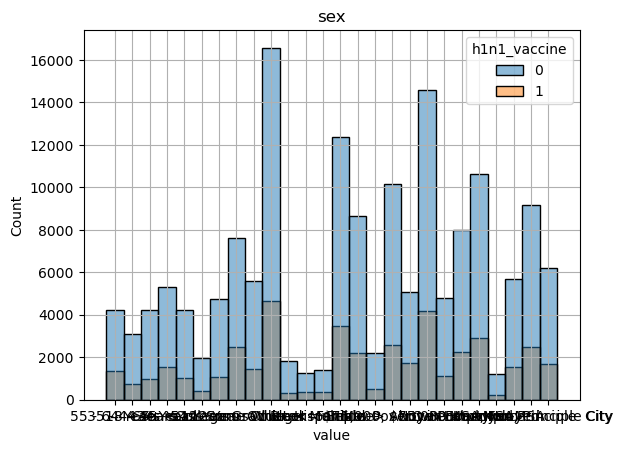

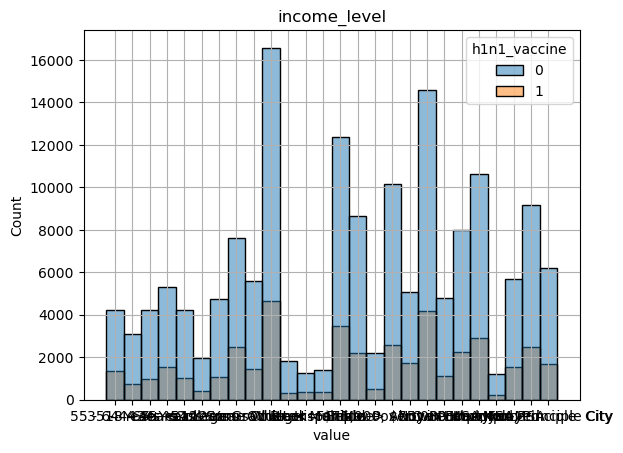

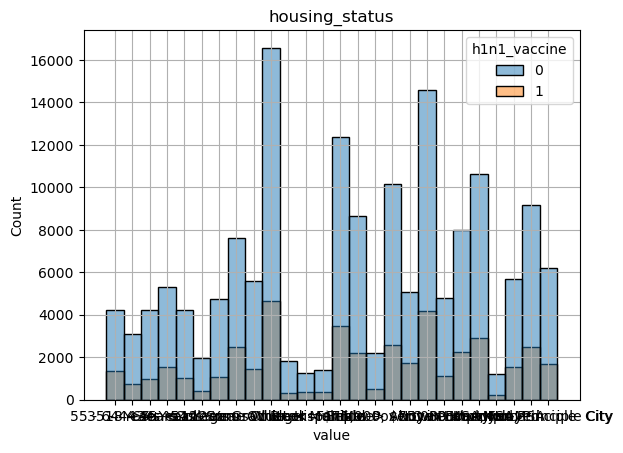

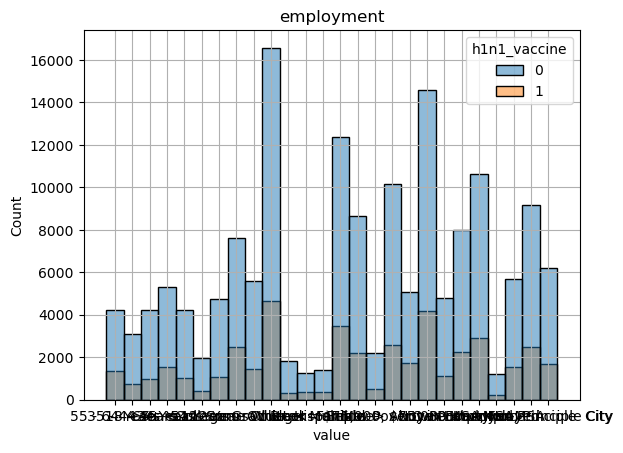

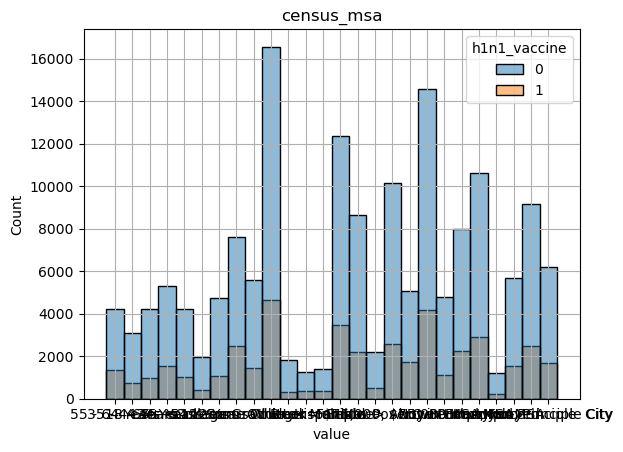

In [15]:
cols=['age_bracket','qualification','race','sex','income_level','housing_status','employment','census_msa']
df_long = pd.melt(df, id_vars='h1n1_vaccine', value_vars=cols)

for i in cols:
    sns.histplot(df_long, x='value', hue='h1n1_vaccine')
    plt.title(i)
    plt.grid()
    plt.show()

In [16]:
df['dr_recc_h1n1_vacc'].value_counts()

0.0    19139
1.0     5408
Name: dr_recc_h1n1_vacc, dtype: int64

In [17]:
df['dr_recc_seasonal_vacc'].value_counts()

0.0    16453
1.0     8094
Name: dr_recc_seasonal_vacc, dtype: int64

In [18]:
df.head(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",2.0,3.0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,2.0,0.0,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,White,Male,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0


In [19]:
h1n1_mode=df['dr_recc_h1n1_vacc'].mode()
h1n1_mode

0    0.0
Name: dr_recc_h1n1_vacc, dtype: float64

In [20]:
seasonal_mode=df['dr_recc_seasonal_vacc'].mode()
seasonal_mode

0    0.0
Name: dr_recc_seasonal_vacc, dtype: float64

In [21]:
df['dr_recc_h1n1_vacc']=df['dr_recc_h1n1_vacc'].fillna(0.0)

In [22]:
df['dr_recc_seasonal_vacc']=df['dr_recc_seasonal_vacc'].fillna(0.0)

In [23]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc                0
dr_recc_seasonal_vacc            0
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [24]:
df.drop(['unique_id','has_health_insur'],axis=1,inplace=True)

In [25]:
df['h1n1_worry'].mode()

0    2.0
Name: h1n1_worry, dtype: float64

In [26]:
df['h1n1_awareness'].mode()

0    1.0
Name: h1n1_awareness, dtype: float64

In [27]:
df['antiviral_medication'].mode()

0    0.0
Name: antiviral_medication, dtype: float64

In [28]:
df['contact_avoidance'].mode()

0    1.0
Name: contact_avoidance, dtype: float64

In [29]:
df['bought_face_mask'].mode()

0    0.0
Name: bought_face_mask, dtype: float64

In [30]:
df['wash_hands_frequently'].mode()

0    1.0
Name: wash_hands_frequently, dtype: float64

In [31]:
df['avoid_large_gatherings'].mode()

0    0.0
Name: avoid_large_gatherings, dtype: float64

In [32]:
df['reduced_outside_home_cont'].mode()

0    0.0
Name: reduced_outside_home_cont, dtype: float64

In [33]:
df['avoid_touch_face'].mode()

0    1.0
Name: avoid_touch_face, dtype: float64

In [34]:
df['chronic_medic_condition'].mode()

0    0.0
Name: chronic_medic_condition, dtype: float64

In [35]:
df['cont_child_undr_6_mnths'].mode()

0    0.0
Name: cont_child_undr_6_mnths, dtype: float64

In [36]:
df['is_health_worker'].mode()

0    0.0
Name: is_health_worker, dtype: float64

In [37]:
df['is_h1n1_vacc_effective'].mode()

0    4.0
Name: is_h1n1_vacc_effective, dtype: float64

In [38]:
df['is_h1n1_risky'].mode()

0    2.0
Name: is_h1n1_risky, dtype: float64

In [39]:
df['sick_from_h1n1_vacc'].mode()

0    2.0
Name: sick_from_h1n1_vacc, dtype: float64

In [40]:
df['is_seas_vacc_effective'].mode()

0    4.0
Name: is_seas_vacc_effective, dtype: float64

In [41]:
df['is_seas_risky'].mode()

0    2.0
Name: is_seas_risky, dtype: float64

In [42]:
df['sick_from_seas_vacc'].mode()

0    1.0
Name: sick_from_seas_vacc, dtype: float64

In [43]:
df['h1n1_worry']=df['h1n1_worry'].fillna(2.0)
df['h1n1_awareness']=df['h1n1_awareness'].fillna(1.0)
df['antiviral_medication']=df['antiviral_medication'].fillna(0.0)
df['contact_avoidance']=df['contact_avoidance'].fillna(1.0)
df['bought_face_mask']=df['bought_face_mask'].fillna(0.0)
df['wash_hands_frequently']=df['wash_hands_frequently'].fillna(1.0)
df['avoid_large_gatherings']=df['avoid_large_gatherings'].fillna(0.0)
df['reduced_outside_home_cont']=df['reduced_outside_home_cont'].fillna(0.0)
df['avoid_touch_face']=df['avoid_touch_face'].fillna(1.0)
df['chronic_medic_condition']=df['chronic_medic_condition'].fillna(0.0)
df['cont_child_undr_6_mnths']=df['cont_child_undr_6_mnths'].fillna(0.0)
df['is_health_worker']=df['is_health_worker'].fillna(0.0)
df['is_h1n1_vacc_effective']=df['is_h1n1_vacc_effective'].fillna(4.0)
df['is_h1n1_risky']=df['is_h1n1_risky'].fillna(2.0)
df['sick_from_h1n1_vacc']=df['sick_from_h1n1_vacc'].fillna(2.0)
df['is_seas_vacc_effective']=df['is_seas_vacc_effective'].fillna(4.0)
df['is_seas_risky']=df['is_seas_risky'].fillna(2.0)
df['sick_from_seas_vacc']=df['sick_from_seas_vacc'].fillna(1.0)

In [44]:
df['qualification'].unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College', nan],
      dtype=object)

In [45]:
df['income_level'].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', nan],
      dtype=object)

In [46]:
df['age_bracket'].unique()

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [47]:
df.loc[df['qualification']=='12 Years','income_level']=df.loc[df['qualification']=='12 Years','income_level'].fillna('Below Poverty')
df.loc[df['qualification']=='< 12 Years','income_level']=df.loc[df['qualification']=='< 12 Years','income_level'].fillna('Below Poverty')
df.loc[df['qualification']=='Some College','income_level']=df.loc[df['qualification']=='Some College','income_level'].fillna('<= $75,000, Above Poverty')
df.loc[df['qualification']=='College Graduate','income_level']=df.loc[df['qualification']=='College Graduate','income_level'].fillna('> $75,000')

In [48]:
df.loc[df['income_level']=='Below Poverty','qualification']=df.loc[df['income_level']=='Below Poverty','qualification'].fillna('< 12 Years')
df.loc[df['income_level']=='<= $75,000, Above Poverty','qualification']=df.loc[df['income_level']=='<= $75,000, Above Poverty','qualification'].fillna('Some College')
df.loc[df['income_level']=='> $75,000','qualification']=df.loc[df['income_level']=='> $75,000','qualification'].fillna('College Graduate')

In [49]:
df['qualification']=df['qualification'].fillna('< 12 Years')
df['income_level']=df['income_level'].fillna('Below Poverty')

In [50]:
df.loc[df['age_bracket']=='18 - 34 Years','marital_status']=df.loc[df['age_bracket']=='18 - 34 Years','marital_status'].fillna('Not Married')

In [51]:
df['marital_status']=df['marital_status'].fillna('Married')

In [52]:
df['housing_status'].unique()

array(['Own', 'Rent', nan], dtype=object)

In [53]:
df.loc[df['income_level']=='Below Poverty','housing_status']=df.loc[df['income_level']=='Below Poverty','housing_status'].fillna('Rent')

In [54]:
df['housing_status']=df['housing_status'].fillna('Own')

In [55]:
df['employment'].unique()

array(['Not in Labor Force', 'Employed', 'Unemployed', nan], dtype=object)

In [56]:
df.loc[df['income_level']=='Below Poverty','employment']=df.loc[df['income_level']=='Below Poverty','employment'].fillna('Unemployed')
df.loc[df['income_level']=='<= $75,000, Above Poverty','employment']=df.loc[df['income_level']=='<= $75,000, Above Poverty','employment'].fillna('Employed')
df.loc[df['income_level']=='> $75,000','employment']=df.loc[df['income_level']=='> $75,000','employment'].fillna('Employed')

In [57]:
df['no_of_adults'].mode()

0    1.0
Name: no_of_adults, dtype: float64

In [58]:
df['no_of_children'].mode()

0    0.0
Name: no_of_children, dtype: float64

In [59]:
df['no_of_adults']=df['no_of_adults'].fillna(1.0)
df['no_of_children']=df['no_of_children'].fillna(0.0)

In [60]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: i

In [61]:
df.describe()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,1.619800,1.261392,0.048714,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,0.202494,...,0.108548,3.852810,2.337589,2.352380,4.025536,2.705321,2.095630,0.887558,0.529599,0.212454
std,0.909016,0.617047,0.215273,0.445127,0.253345,0.379213,0.479264,0.472444,0.466942,0.401866,...,0.311077,1.000195,1.276825,1.353339,1.077131,1.375216,1.328782,0.749980,0.925264,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,5.000000,4.000000,4.000000,5.000000,4.000000,2.000000,1.000000,1.000000,0.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [62]:
df['h1n1_vaccine'].value_counts(normalize=True)

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26707 non-null  float64
 1   h1n1_awareness             26707 non-null  float64
 2   antiviral_medication       26707 non-null  float64
 3   contact_avoidance          26707 non-null  float64
 4   bought_face_mask           26707 non-null  float64
 5   wash_hands_frequently      26707 non-null  float64
 6   avoid_large_gatherings     26707 non-null  float64
 7   reduced_outside_home_cont  26707 non-null  float64
 8   avoid_touch_face           26707 non-null  float64
 9   dr_recc_h1n1_vacc          26707 non-null  float64
 10  dr_recc_seasonal_vacc      26707 non-null  float64
 11  chronic_medic_condition    26707 non-null  float64
 12  cont_child_undr_6_mnths    26707 non-null  float64
 13  is_health_worker           26707 non-null  flo

In [64]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [65]:
df['age_bracket']=LE.fit_transform(df['age_bracket'])
df['qualification']=LE.fit_transform(df['qualification'])
df['race']=LE.fit_transform(df['race'])
df['sex']=LE.fit_transform(df['sex'])
df['income_level']=LE.fit_transform(df['income_level'])
df['marital_status']=LE.fit_transform(df['marital_status'])
df['housing_status']=LE.fit_transform(df['housing_status'])
df['employment']=LE.fit_transform(df['employment'])
df['census_msa']=LE.fit_transform(df['census_msa'])

In [66]:
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3,0,2,1,0,1,2,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,3,1,2,1,1,0,0,0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0,1,0,0,0,2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3,0,2,1,1,1,1,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3,0,0,0,0,0,0,1.0,0.0,0


In [67]:
df['sex'].unique()

array([0, 1])

In [68]:
df1=df.copy()

In [69]:
df1.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3,0,2,1,0,1,2,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,3,1,2,1,1,0,0,0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0,1,0,0,0,2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3,0,2,1,1,1,1,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3,0,0,0,0,0,0,1.0,0.0,0


## Train Test Split

In [70]:
x=df1.drop('h1n1_vaccine',axis=1)

In [71]:
y=df1['h1n1_vaccine']

In [72]:
x.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,3,0,2,1,0,1,2,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,3,1,2,1,1,0,0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,1,0,1,0,0,0,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,3,0,2,1,1,1,1,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3,3,0,0,0,0,0,0,1.0,0.0


In [73]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: h1n1_vaccine, dtype: int64

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1,stratify=y)

In [75]:
y_train.value_counts(normalize=True)

0    0.787525
1    0.212475
Name: h1n1_vaccine, dtype: float64

In [76]:
y_test.value_counts(normalize=True)

0    0.787595
1    0.212405
Name: h1n1_vaccine, dtype: float64

## Logistic Regression

In [77]:
model=LogisticRegression(verbose=True)
model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished


LogisticRegression(verbose=True)

In [78]:
model.fit(x_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


LogisticRegression(verbose=True)

## Predicting on training and test data

In [79]:
y_train_predict=model.predict(x_train)
y_test_predict=model.predict(x_test)

In [80]:
y_train_predict

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

## Getting the predicted classes and probs

In [81]:
y_train_predict_probs=model.predict_proba(x_train)
y_test_predict_probs=model.predict_proba(x_test)

In [82]:
pd.DataFrame(y_train_predict_probs).head()

,0,1
0,0.937030,0.062970
1,0.960187,0.039813
2,0.316847,0.683153
3,0.809291,0.190709
4,0.834254,0.165746


In [83]:
pd.DataFrame(y_test_predict_probs).head()

,0,1
0,0.902680,0.097320
1,0.872079,0.127921
2,0.987580,0.012420
3,0.974107,0.025893
4,0.863861,0.136139


## Model Evaluation

In [84]:
model.score(x_train,y_train)

0.8333155023002032

In [85]:
model.score(x_test,y_test)

0.8410083614127044

## AUC and ROC for training data

AUC Train 0.8238571029676147


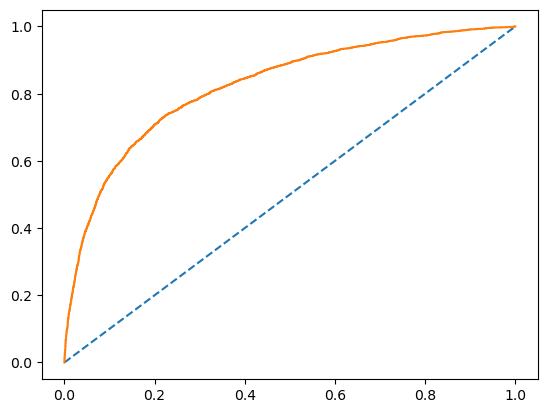

In [86]:
# predict probabilities
probs=model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs=probs[:,1]
# calculate AUC
auc=roc_auc_score(y_train,probs)
print('AUC Train {}'.format(auc))
# calculate roc curve
train_FPR,train_TPR,threshold=roc_curve(y_train,probs)
plt.plot([0,1],[0,1],linestyle='--')
# plot the roc curve for the model
plt.plot(train_FPR,train_TPR)

AUC Test 0.8414606693663963


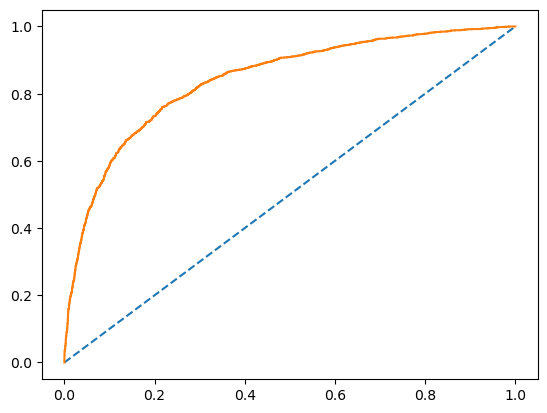

In [87]:
# predict probabilities
probs=model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs=probs[:,1]
# calculate AUC
auc=roc_auc_score(y_test,probs)
print('AUC Test {}'.format(auc))
# calculate roc curve
test_FPR,test_TPR,threshold=roc_curve(y_test,probs)
plt.plot([0,1],[0,1],linestyle='--')
# plot the roc curve for the model
plt.plot(test_FPR,test_TPR)

## Confusion matrix for the training data

In [88]:
confusion_matrix(y_train,y_train_predict)

array([[13960,   762],
       [ 2354,  1618]], dtype=int64)

<AxesSubplot:>

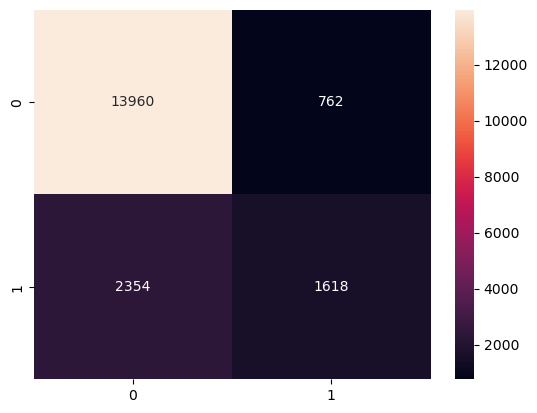

In [89]:
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True,fmt='g')

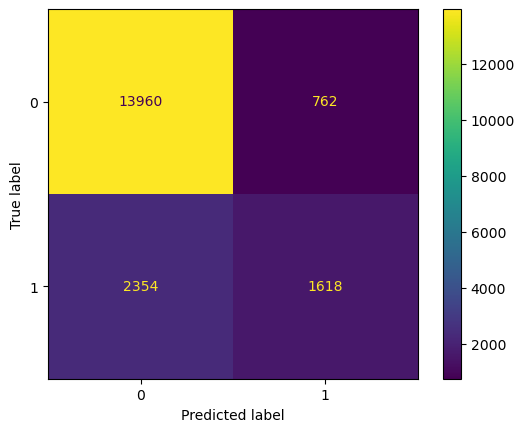

In [90]:
plot_confusion_matrix(model,x_train,y_train)

In [91]:
from sklearn.metrics import classification_report

In [92]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     14722
           1       0.68      0.41      0.51      3972

    accuracy                           0.83     18694
   macro avg       0.77      0.68      0.70     18694
weighted avg       0.82      0.83      0.82     18694



## Confusion matrix for test data

In [93]:
confusion_matrix(y_test,y_test_predict)

array([[5983,  328],
       [ 946,  756]], dtype=int64)

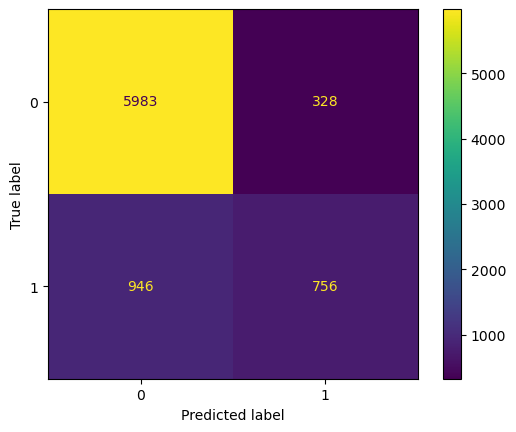

In [94]:
plot_confusion_matrix(model,x_test,y_test)

In [95]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6311
           1       0.70      0.44      0.54      1702

    accuracy                           0.84      8013
   macro avg       0.78      0.70      0.72      8013
weighted avg       0.83      0.84      0.83      8013



## Applying GridsearchCv for logistic regression

In [96]:
grid={'penalty':['l1','l2','elasticnet','None'],
     'solver':['lbfgs','liblinear'],
     'tol':[0.01,0.0001]}

In [97]:
model=LogisticRegression(max_iter=10000)
grid_search=GridSearchCV(estimator=model,param_grid=grid,cv=3,scoring='recall',n_jobs=-1)

In [98]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'None'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.01, 0.0001]},
             scoring='recall')

In [99]:
grid_search.best_params_

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.01}

In [100]:
best_model=grid_search.best_estimator_

In [101]:
best_model.score(x_train,y_train)

0.8333155023002032

In [102]:
best_model.score(x_test,y_test)

0.8396355921627355

In [103]:
y_train_predict=best_model.predict(x_train)
y_test_predict=best_model.predict(x_test)

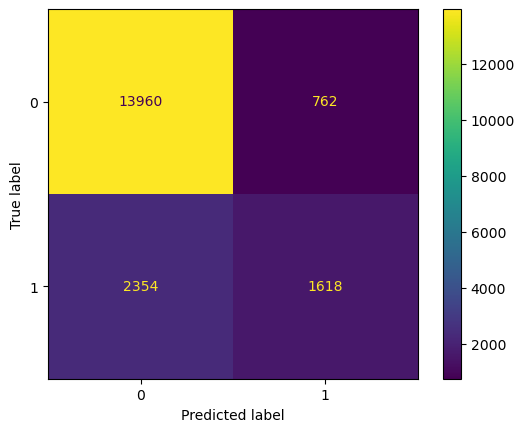

In [104]:
plot_confusion_matrix(best_model,x_train,y_train)

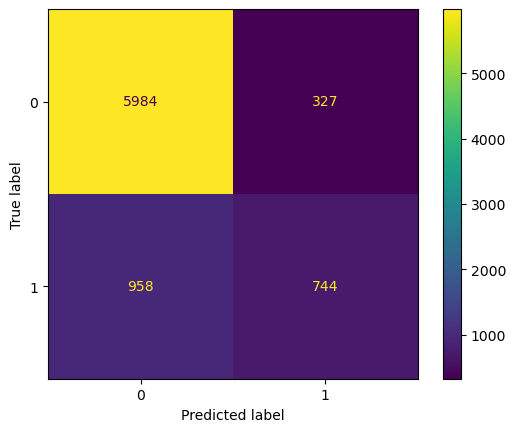

In [105]:
plot_confusion_matrix(best_model,x_test,y_test)

In [106]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     14722
           1       0.68      0.41      0.51      3972

    accuracy                           0.83     18694
   macro avg       0.77      0.68      0.70     18694
weighted avg       0.82      0.83      0.82     18694



In [107]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6311
           1       0.69      0.44      0.54      1702

    accuracy                           0.84      8013
   macro avg       0.78      0.69      0.72      8013
weighted avg       0.83      0.84      0.83      8013



In [108]:
# with grid search cv the performance increased by 2% in both train and test

In [109]:
bal_model=LogisticRegression(penalty='l2',solver='lbfgs',max_iter=10000,tol=0.01,class_weight='balanced')

In [110]:
bal_model.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, tol=0.01)

In [111]:
y_train_predict=bal_model.predict(x_train)
y_test_predict=bal_model.predict(x_test)

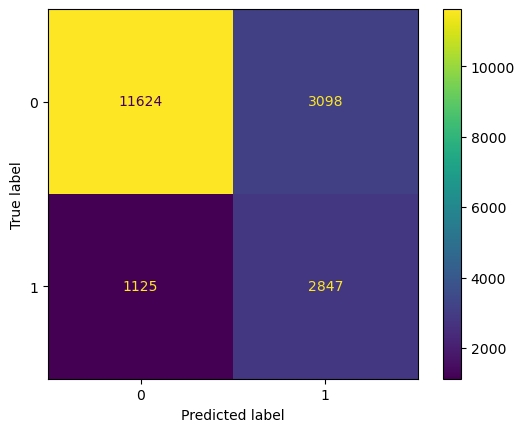

In [112]:
plot_confusion_matrix(bal_model,x_train,y_train)

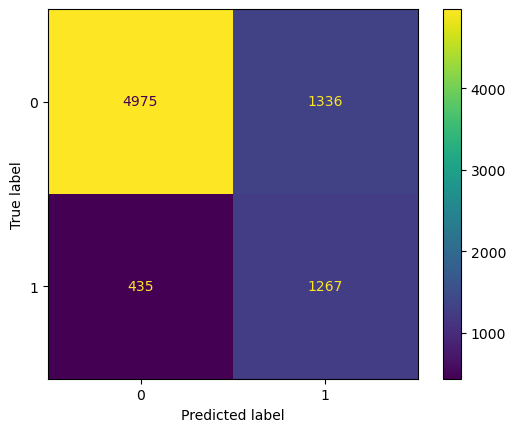

In [113]:
plot_confusion_matrix(bal_model,x_test,y_test)

In [114]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85     14722
           1       0.48      0.72      0.57      3972

    accuracy                           0.77     18694
   macro avg       0.70      0.75      0.71     18694
weighted avg       0.82      0.77      0.79     18694



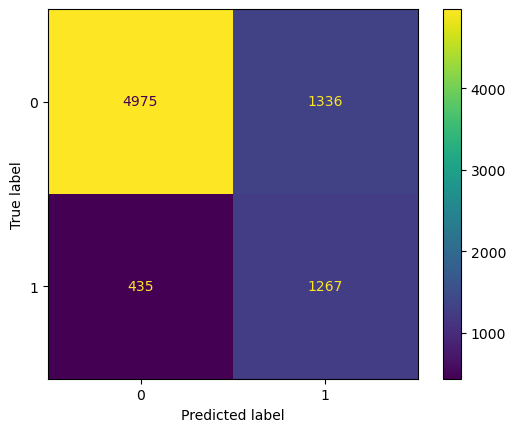

In [115]:
plot_confusion_matrix(bal_model,x_test,y_test)

In [116]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      6311
           1       0.49      0.74      0.59      1702

    accuracy                           0.78      8013
   macro avg       0.70      0.77      0.72      8013
weighted avg       0.83      0.78      0.79      8013

